CSE422 (Artificial Intelligence)

LAB Project

Group-6

Sec-5

*Project Title:*
**Rainfall Prediction** Using Different Machine Learning Algorithms Based on a Dataset of  Daily Weather Observations across Australia of 10 Years.

---


SOHIDUL HAQUE SAHID ( ID- 20301403 )

HM LAYES DELOWER ( ID- 18201059 )

UTSHA SEN DHRUBA ( ID- 20301338 )



# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

## **Importing Dataset**

In [ ]:
rain_data = pd.read_csv('/content/drive/MyDrive/MLproject/weatherAUS.csv')
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# **Dataset Description**

In [ ]:
print(type(rain_data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print("Shape of data:",rain_data.shape)

Shape of data: (145460, 23)


In [ ]:
print(rain_data.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [ ]:
print(rain_data['RainTomorrow'])

0          No
1          No
2          No
3          No
4          No
         ... 
145455     No
145456     No
145457     No
145458     No
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: object


In [ ]:
print(type(rain_data['RainTomorrow']))

<class 'pandas.core.series.Series'>


In [ ]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
rain_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# **Correlation of all the features**

In [ ]:
rain_corr = rain_data.corr()
rain_corr

<ipython-input-4-30efcad65406>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rain_corr = rain_data.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


<Axes: >

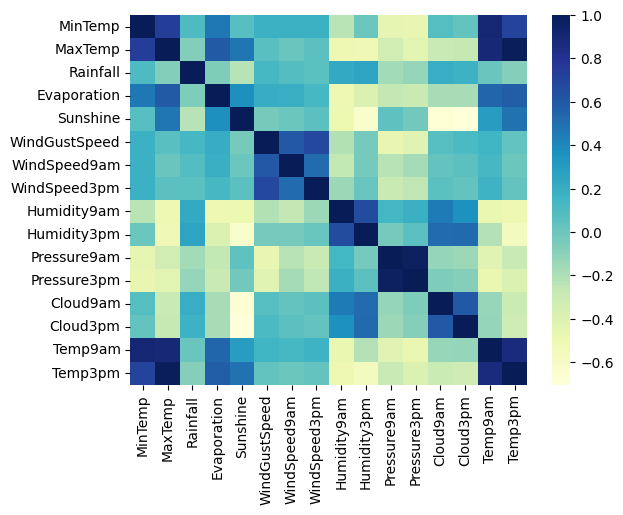

In [ ]:
import seaborn as sns
sns.heatmap(rain_corr, cmap = 'YlGnBu')


# **Checking Null values**

In [ ]:
rain_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
round(rain_data.isna().sum() / len(rain_data), 3)

Date             0.000
Location         0.000
MinTemp          0.010
MaxTemp          0.009
Rainfall         0.022
Evaporation      0.432
Sunshine         0.480
WindGustDir      0.071
WindGustSpeed    0.071
WindDir9am       0.073
WindDir3pm       0.029
WindSpeed9am     0.012
WindSpeed3pm     0.021
Humidity9am      0.018
Humidity3pm      0.031
Pressure9am      0.104
Pressure3pm      0.103
Cloud9am         0.384
Cloud3pm         0.408
Temp9am          0.012
Temp3pm          0.025
RainToday        0.022
RainTomorrow     0.022
dtype: float64

# **Solving null value problems**

**Dropping columns**

In [ ]:
#dropping columns(unnecessary and huge null value)
rain_data = rain_data.drop(['Evaporation','Sunshine','Date'],axis=1)
rain_data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Dropping Rows**

In [ ]:
#dropping rows
rain_data_subset =  rain_data[rain_data['RainTomorrow'].notnull()]
print('shape before dropping rows',rain_data.shape)
print('shape after dropping rows',rain_data_subset.shape)

shape before dropping rows (145460, 20)
shape after dropping rows (142193, 20)


In [ ]:
rain_data_subset2 =  rain_data_subset[rain_data_subset['RainToday'].notnull()]
rain_data_subset2.shape

(140787, 20)

In [ ]:
final_data = rain_data_subset2
final_data.shape

(140787, 20)

**Imputing missing values**
(for continuous features)

In [ ]:
from sklearn.impute import SimpleImputer
cont_feature = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
for i in range(len(cont_feature)):
  impute = SimpleImputer(missing_values=np.nan, strategy='mean')
  impute.fit(final_data[[cont_feature[i]]])
  final_data[cont_feature[i]] = impute.transform(final_data[[cont_feature[i]]])
  i = i+1
final_data

<ipython-input-9-a3e882291baf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data[cont_feature[i]] = impute.transform(final_data[[cont_feature[i]]])
<ipython-input-9-a3e882291baf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data[cont_feature[i]] = impute.transform(final_data[[cont_feature[i]]])
<ipython-input-9-a3e882291baf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,No,No


In [ ]:
round(final_data.isna().sum() / len(final_data), 3)

Location         0.000
MinTemp          0.000
MaxTemp          0.000
Rainfall         0.000
WindGustDir      0.065
WindGustSpeed    0.000
WindDir9am       0.069
WindDir3pm       0.026
WindSpeed9am     0.000
WindSpeed3pm     0.000
Humidity9am      0.000
Humidity3pm      0.000
Pressure9am      0.000
Pressure3pm      0.000
Cloud9am         0.000
Cloud3pm         0.000
Temp9am          0.000
Temp3pm          0.000
RainToday        0.000
RainTomorrow     0.000
dtype: float64

**Imputing missing values** (for Categorical features) 

In [ ]:
Cat_features=['WindGustDir', 'WindDir9am', 'WindDir3pm']
for i in range(len(Cat_features)):
  impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  impute.fit(final_data[[Cat_features[i]]])
  final_data[Cat_features[i]] = impute.transform(final_data[[Cat_features[i]]])
  i = i+1
final_data

<ipython-input-10-df801d626a63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data[Cat_features[i]] = impute.transform(final_data[[Cat_features[i]]])
<ipython-input-10-df801d626a63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data[Cat_features[i]] = impute.transform(final_data[[Cat_features[i]]])
<ipython-input-10-df801d626a63>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,No,No


In [ ]:
round(final_data.isna().sum() / len(final_data), 3)

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

# **Feature Engineering**

In [ ]:
print(final_data['RainTomorrow'].unique())
print(final_data['RainToday'].unique())

['No' 'Yes']
['No' 'Yes']


In [ ]:
#removing yes/no value
final_data['RainTomorrow'] = final_data['RainTomorrow'].map({'Yes':1,'No':0})
final_data['RainToday'] = final_data['RainToday'].map({'Yes':1,'No':0})
final_data

<ipython-input-12-796c8df314ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['RainTomorrow'] = final_data['RainTomorrow'].map({'Yes':1,'No':0})
<ipython-input-12-796c8df314ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['RainToday'] = final_data['RainToday'].map({'Yes':1,'No':0})


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0,0
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0,0
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0,0
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0,0


# **Encoding catagorical values**(Label Encoding)

In [ ]:
from sklearn.preprocessing import LabelEncoder

final_data = final_data.copy()
labelencoder = LabelEncoder()
final_data['Location Label'] = labelencoder.fit_transform(final_data['Location'])

final_data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location Label
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0,2
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0,2
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0,2
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,...,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0,0,41
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,...,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0,0,41
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,...,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0,0,41
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,...,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0,0,41


In [ ]:
final_data['WindGustDir_Label'] = labelencoder.fit_transform(final_data['WindGustDir'])
final_data['WindDir9am_Label'] = labelencoder.fit_transform(final_data['WindDir9am'])
final_data['WindDir3pm_Label'] = labelencoder.fit_transform(final_data['WindDir3pm'])

In [ ]:
final_data = final_data.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1)
final_data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location Label,WindGustDir_Label,WindDir9am_Label,WindDir3pm_Label
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0,2,13,13,14
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0,2,14,6,15
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0,2,15,13,15
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0,2,4,9,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2,13,1,7


# **Imbalanced Dataset checking**

In [ ]:
rain_tomorrow = final_data[final_data["RainTomorrow"]==1]

not_rain_tomorrow = final_data[final_data["RainTomorrow"]==0]

print('Shape of rainning tomorrow',rain_tomorrow.shape)
print('Shape of not rainning tomorrow',not_rain_tomorrow.shape)

Shape of rainning tomorrow (31201, 20)
Shape of not rainning tomorrow (109586, 20)


Text(0, 0.5, 'parc')

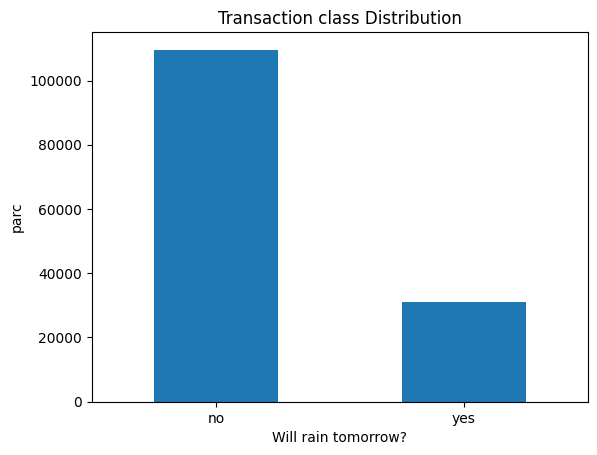

In [ ]:
import matplotlib.pyplot as plt
count_classes = pd.value_counts(final_data["RainTomorrow"], sort = True)
count_classes.plot(kind="bar", rot=0)
plt.title("Transaction class Distribution")
plt.xticks(range(2), ["no", "yes"])
plt.xlabel("Will rain tomorrow?")
plt.ylabel("parc")

# **Feature value and Target value**

In [ ]:
columns = final_data.columns.tolist()
#Filter the columns to remove data we  do not want
columns = [c for c in columns if c not in ["RainTomorrow"]]
#store the var we are predicting
target = "RainTomorrow"
#define a random state
state = np.random.RandomState(42)
#feature value
X = final_data[columns]
#target value
Y = final_data[target]
x_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

# **Balancing** (under sampling)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  
under_sampler = RandomUnderSampler()
X, Y = under_sampler.fit_resample(X, Y)
X.shape, Y.shape

((62402, 19), (62402,))

# **Scaling**


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[-1.70800643, -0.26229161, -0.33519763, ..., -1.12230051,
        -0.25010784, -0.19654922],
       [ 0.85390573,  0.75017882, -0.33519763, ...,  0.17153481,
        -1.14245944,  0.46913797],
       [-1.98919191, -0.65603011, -0.33519763, ...,  1.03409169,
        -0.91937154,  1.13482517],
       ...,
       [ 0.41650609, -0.13573281,  0.27718823, ..., -1.55357896,
        -0.69628364, -1.52792362],
       [ 0.80704148,  0.62362001,  0.79951735, ..., -0.04410441,
        -1.58863523,  0.69103371],
       [ 0.94763422,  0.86267553,  2.78076572, ..., -1.76921818,
        -1.58863523, -1.74981935]])

# **Train and Test data spliting**

In [ ]:
from sklearn.model_selection import train_test_split
#Split the data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(43681, 19)
(18721, 19)


Scaling


In [ ]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train)
print(x_test)

[[ 1.40111278  0.79205097 -0.29923745 ... -1.33794963  0.64200379
   0.24414333]
 [-0.64929019 -1.12522939 -0.33507978 ...  1.03477362  1.53379821
   0.91128141]
 [-0.14842839  0.41141443 -0.26339511 ... -1.33794963 -0.69568785
  -0.64537412]
 ...
 [-0.52407474 -1.40718238  3.32083816 ... -1.55365175 -0.69568785
  -0.64537412]
 [ 0.47764885  0.38321913 -0.33507978 ... -0.69084329 -0.47273924
  -0.64537412]
 [-0.8058095  -0.54722575 -0.33507978 ...  1.03477362 -0.91863645
   1.5784195 ]]
[[-0.77450564 -1.12522939 -0.33507978 ... -1.12224752 -0.91863645
  -1.09013284]
 [ 1.7141514   1.17268751 -0.33507978 ... -1.33794963  0.19610658
  -0.86775348]
 [-0.83711336 -0.78688579  0.13087055 ... -0.04373695 -1.58748227
   0.02176397]
 ...
 [ 0.1020025  -0.87147169  0.34592454 ...  1.25047574 -0.02684203
   1.5784195 ]
 [-1.11884812 -1.28030353 -0.33507978 ... -0.25943906  1.53379821
  -1.75727093]
 [-1.2597155  -0.78688579 -0.31715861 ... -1.76935386 -1.58748227
  -1.3125122 ]]


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [ ]:
# Training Model
model_lg.fit(x_train, y_train.ravel())

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [ ]:
# Making Prediction
pred_lg = model_lg.predict(x_test)
pred_lg

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.7827573313391378


In [ ]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      9280
           1       0.80      0.76      0.78      9441

    accuracy                           0.78     18721
   macro avg       0.78      0.78      0.78     18721
weighted avg       0.78      0.78      0.78     18721



<Axes: >

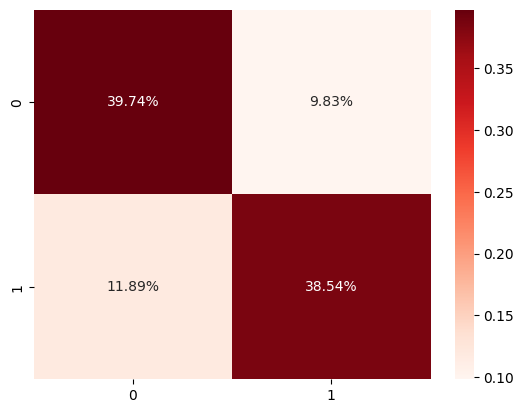

In [ ]:
#confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

# **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Creating model object
model_nv = GaussianNB()

In [ ]:
# Training Model
model_nv.fit(x_train, y_train.ravel())

GaussianNB()

In [ ]:
# Making Prediction
pred_nv = model_nv.predict(x_test)
pred_nv

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Calculating Accuracy Score
nv = accuracy_score(y_test, pred_nv)
print(nv)

0.7502804337375141


In [ ]:
print(classification_report(y_test,pred_nv))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      9280
           1       0.80      0.68      0.73      9441

    accuracy                           0.75     18721
   macro avg       0.76      0.75      0.75     18721
weighted avg       0.76      0.75      0.75     18721



<Axes: >

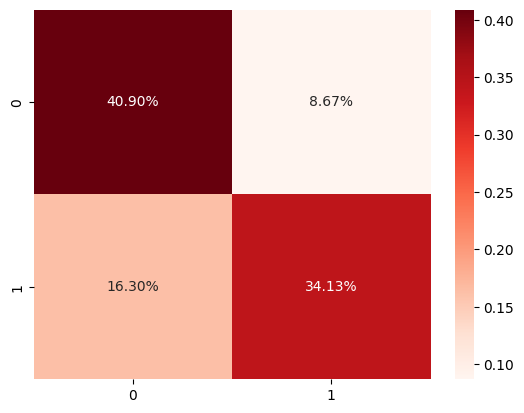

In [ ]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_nv)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

## **KNN Classifier**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [ ]:
# Training Model
model_kn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [ ]:
# Making Prediction
pred_kn = model_kn.predict(x_test)
pred_kn

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.7782703915389135


In [ ]:
print(classification_report(y_test,pred_kn))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      9280
           1       0.79      0.76      0.78      9441

    accuracy                           0.78     18721
   macro avg       0.78      0.78      0.78     18721
weighted avg       0.78      0.78      0.78     18721



<Axes: >

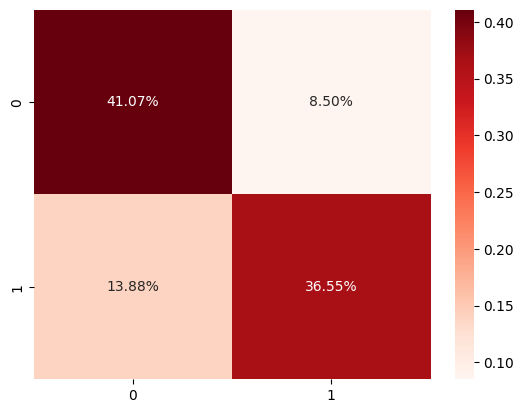

In [ ]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

,Model,Accuracy_score
0,Logistic Regression,0.782757
2,KNeighbours,0.778270
1,Naive Bayes,0.750280


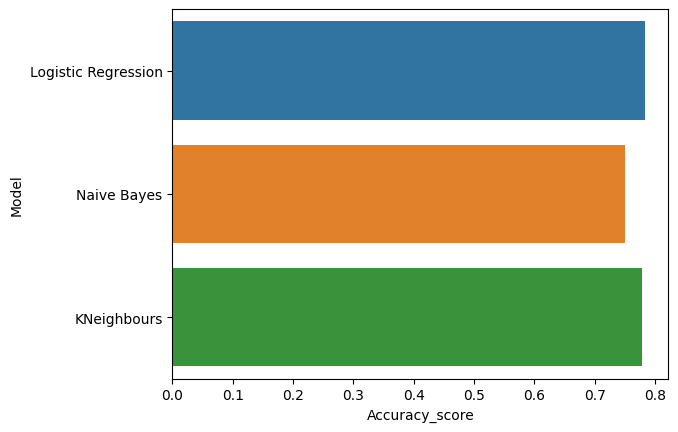

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Naive Bayes', 'KNeighbours'],
    'Accuracy_score' :[lg, nv, kn]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)